## OpenBB Exploratory Data Analysis Notebook
Author: Stephanie Choi\
Github: https://github.com/stephaniec2020/

This notebook provides an example template for exploring OpenBB data using Jupyter Notebook and Plotly.


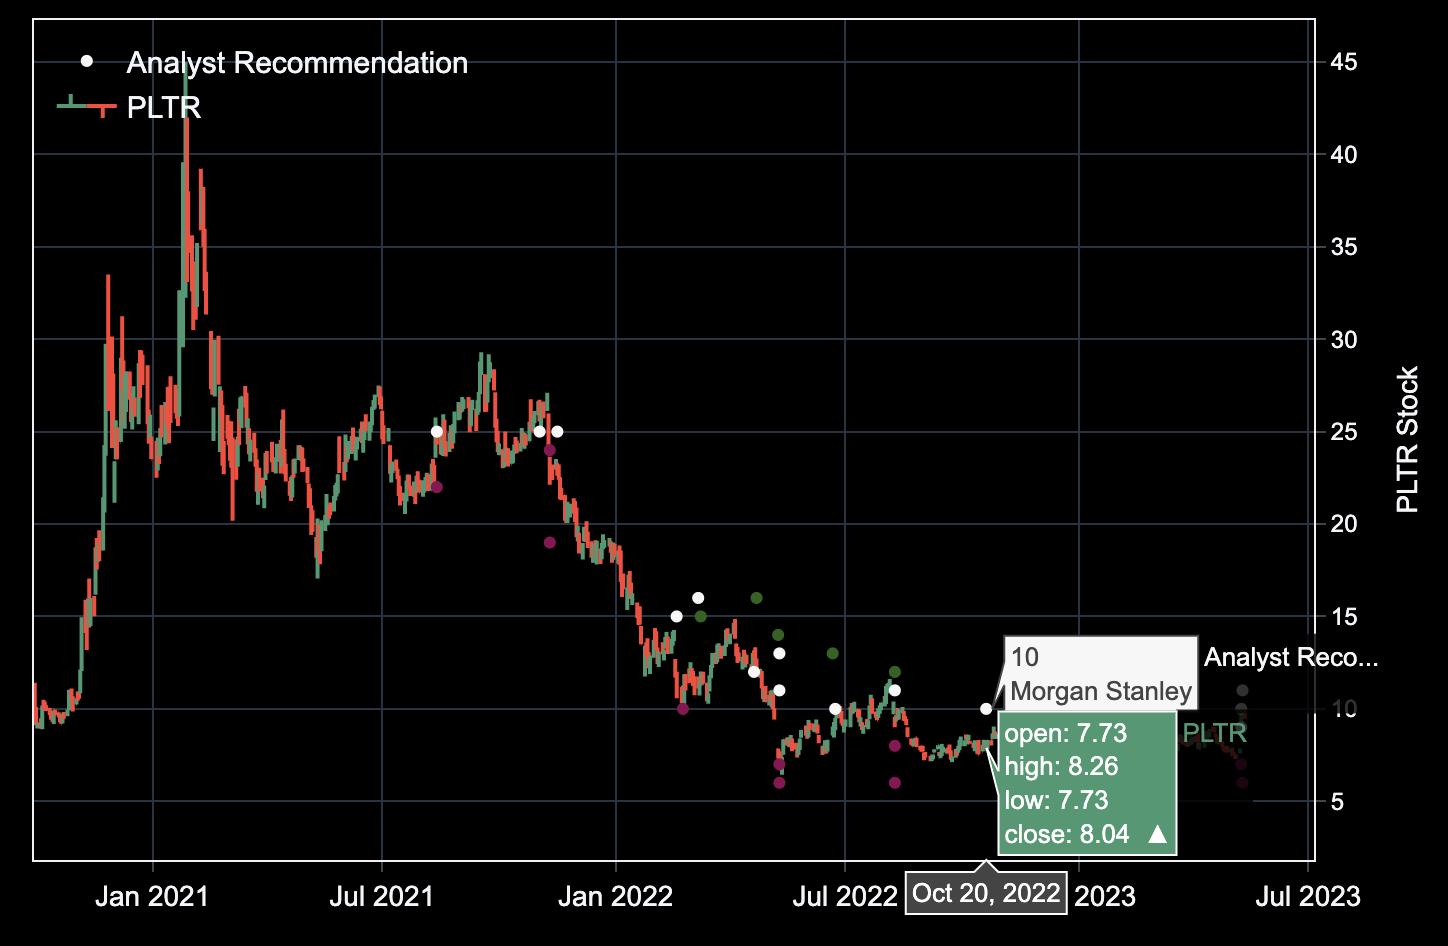

### Dataset

OpenBB is a leading open-source investment research software platform that gives you access to high-quality financial market data and analytical tools. Our mission is to make investment research effective, powerful and accessible to everyone. Equity Analysts can now do investment research from anywhere with OpenBB.

### Why plotly?

Plotly is often preferred over Matplotlib for interactive data visualization due to its rich interactivity and interactive features, especially well-suited for OHLC (Open, High, Low, Close) for stock prices.

### Analysis

The code in this notebook will:
- Load the OpenBB stock data into a DataFrame
- Plot the OHLC graph using Plotly
- Load the analyst recommendation and target price
- Plot analyst recommendation and target price using Plotly

Feel free to modify the code and customize the graph's layout according to your needs.

Let's get started by running the code cells below to visualize the OHLC graph.

### 0. Install required packages

In [1]:
# ! pip install openbb plotly

### 1. Import libraries 

In [10]:
from openbb_terminal.sdk import openbb
import plotly.graph_objects as go

### 2. Load ticker and download the data from OpenBB

In [3]:
symbol = "TICKER" # Subsitute ticker/symbol to the string, "PLTR" was used to demonstrate in this notebook. 

In [4]:
ohlc = openbb.stocks.load(symbol=symbol).reset_index()
ohlc

Loading Daily data for PLTR with starting period 2020-09-30.

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2020-09-30,10.00,11.410,9.110,9.50,9.50,338584400,0.0,0.0
1,2020-10-01,9.69,10.100,9.230,9.46,9.46,124297600,0.0,0.0
2,2020-10-02,9.06,9.280,8.940,9.20,9.20,55018300,0.0,0.0
3,2020-10-05,9.43,9.490,8.920,9.03,9.03,36316900,0.0,0.0
4,2020-10-06,9.04,10.180,8.900,9.90,9.90,90864000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
654,2023-05-08,7.64,7.855,7.590,7.74,7.74,105304000,0.0,0.0
655,2023-05-09,9.22,9.690,8.655,9.55,9.55,223573300,0.0,0.0
656,2023-05-10,9.73,10.300,9.460,9.94,9.94,149375000,0.0,0.0
657,2023-05-11,10.14,10.159,9.710,9.88,9.88,73754100,0.0,0.0


### 3. Plot the OHLC data using Plotly

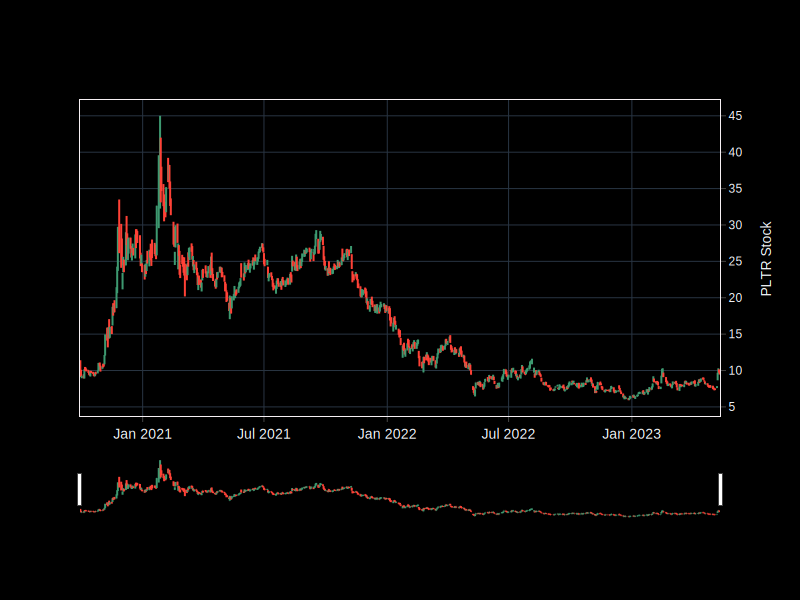

In [9]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Ohlc(x=ohlc['date'], open=ohlc['Open'], high=ohlc['High'], low=ohlc['Low'], close=ohlc['Close'], name=symbol))
fig.update_layout(xaxis_rangeslider_visible=True, 
                  font_family="Arial", 
                  font_size=12,
                  yaxis_title=symbol+' Stock',
                  width=800, height=600)

fig.show("svg") # use fig.show() for interactive plotly graph

### 4. Load analyst recommendation and target price from OpenBB

Analyst recommendations typically fall into three categories: Buy, Hold, and Sell. These recommendations reflect the analyst's opinion on the stock's potential performance.

- **Buy**: An analyst recommends buying a stock when they believe its price is likely to increase. It implies that the stock is undervalued or has strong growth potential.

- **Hold**: A hold recommendation suggests that the stock's current price is fairly valued, and there is no immediate need to buy or sell. It implies a neutral stance.

- **Sell**: An analyst recommends selling a stock when they believe its price is likely to decrease. It suggests that the stock is overvalued or may face challenges in the future.

In [6]:
analyst_rec = openbb.stocks.fa.pt(symbol=symbol).reset_index()

In [7]:
analyst_rec['Rating'] = analyst_rec['Rating'].astype('object')
valid_ratings = ['BUY', 'HOLD', 'SELL'] # ensure only "BUY", "HOLD", "SELL"
analyst_rec = analyst_rec[analyst_rec['Rating'].isin(valid_ratings)]
# Transform BUY = 1, HOLD = 0, SELL = -1
rating_dict = {u'BUY': 1,
            u'HOLD': 0,
            u'SELL': -1}
analyst_rec = analyst_rec.replace({'Rating': rating_dict})
analyst_rec.head(5)

,Date,Company,Rating,Price Target
0,2021-08-13,RBC Capital Markets,0,25.0
1,2021-08-13,Morgan Stanley,-1,22.0
2,2021-11-02,Deutsche Bank,0,25.0
3,2021-11-10,RBC Capital Markets,-1,19.0
4,2021-11-10,Morgan Stanley,-1,24.0


### 5. Plot analyst recommendation, target price overlay on OHLC using Plotly

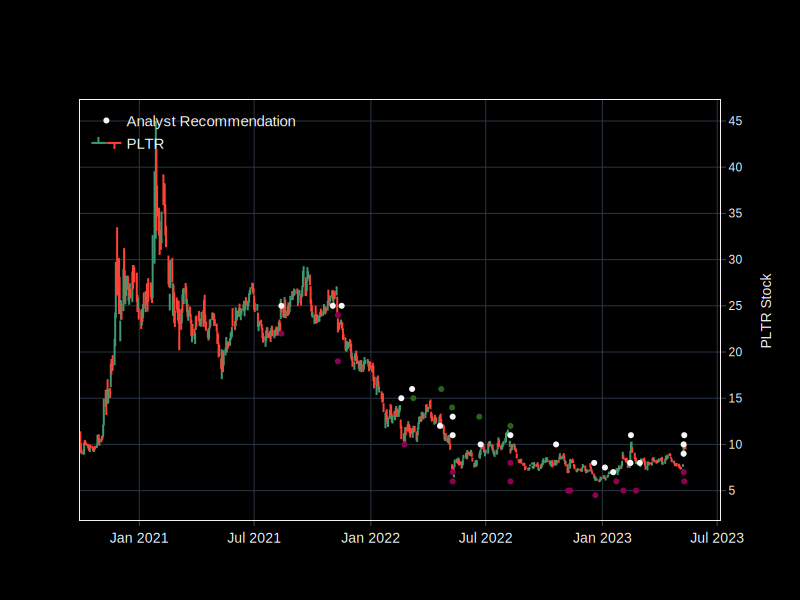

In [8]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=analyst_rec['Date'], y=analyst_rec['Price Target'], 
                         text=analyst_rec['Company'],
                         mode='markers',
                         name='Analyst Recommendation', marker_color=analyst_rec['Rating']))
fig.add_trace(go.Ohlc(x=ohlc['date'], open=ohlc['Open'], high=ohlc['High'], low=ohlc['Low'], close=ohlc['Close'], name=symbol))
fig.update_layout(xaxis_rangeslider_visible=False, 
                  font_family="Arial", 
                  font_size=12,
                  yaxis_title=symbol+' Stock',
                  width=800, height=600)

fig.show("svg") # use fig.show() for interactive plotly graph


The ability to hover over the graph and interact with the data points provides an excellent starting point for data exploration. Additionally, I have incorporated analyst recommendation and target price into the graph, providing an opportunity to explore the insights offered by various investment institutes and their recommendations.

For more information, please visit: [OpenBB SDK Docs](https://docs.openbb.co/sdk/reference)
and Plotly: https://plotly.com/python/ohlc-charts/

Happy exploring, and feel free to reach out if you have any questions!

### Disclaimer

Please note that any investment views or perspectives expressed are for educational purposes only and do not constitute professional advice. All investment decisions should be made at your own risk and after conducting thorough research and analysis. I make no representations or warranties regarding the accuracy or completeness of any information provided, and shall not be responsible or liable for any investment decisions made based on such information. All rights reserved.